# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 10K
- Data = [Bracket, non-Bracket, Palindrome, Matching-Pair, unMatching]
- Deduplication

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from trainer.supervised_trainer_unmatching import SupervisedTrainer_unmatching
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
data_name = ["Bracket_dedup", "non-Bracket_dedup", "Palindrome_dedup", "Matching-Pair_dedup"]
data_path = ["data/bracket_dedup/N100", "data/nonbracket_dedup/N100", "data/palindrome_dedup/N100", "data/matching_pairs_dedup/N100"]
character_accuracy = []
sentance_accuracy = []

# Prepare dataset

data : Bracket_dedup


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-28 00:06:08,658 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-28 00:07:27,746 INFO   Finished epoch 1: Train loss: 20.8848,

2019-02-28 01:32:02,076 INFO   Finished epoch 53: Train loss: 1.7653, Dev loss: 1.8443, Accuracy(Character): 0.7641, Accuracy(Word): 0.2252
2019-02-28 01:33:43,450 INFO   Finished epoch 54: Train loss: 1.6694, Dev loss: 1.6865, Accuracy(Character): 0.7805, Accuracy(Word): 0.2351
2019-02-28 01:35:21,052 INFO   Finished epoch 55: Train loss: 1.7135, Dev loss: 1.6915, Accuracy(Character): 0.7646, Accuracy(Word): 0.2238
2019-02-28 01:36:56,479 INFO   Finished epoch 56: Train loss: 1.5951, Dev loss: 2.2516, Accuracy(Character): 0.6963, Accuracy(Word): 0.2106
2019-02-28 01:38:34,260 INFO   Finished epoch 57: Train loss: 1.6120, Dev loss: 1.7589, Accuracy(Character): 0.7470, Accuracy(Word): 0.2129
2019-02-28 01:40:11,260 INFO   Finished epoch 58: Train loss: 1.6032, Dev loss: 1.9385, Accuracy(Character): 0.7540, Accuracy(Word): 0.2004
2019-02-28 01:41:46,484 INFO   Finished epoch 59: Train loss: 1.6013, Dev loss: 1.8126, Accuracy(Character): 0.7739, Accuracy(Word): 0.2321
2019-02-28 01:43:22,

data : non-Bracket_dedup


2019-02-28 02:48:12,906 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 02:49:36,160 INFO   Finished epoch 1: Train loss: 17.2506, Dev loss: 13.6823, Accuracy(Character): 0.1293, Accuracy(Word): 0.0000
2019-02-28 02:51:05,874 INFO   Finished epoch 2: Train loss: 13.4549, Dev loss: 13.4065, Accuracy(Character): 0.1549, Accuracy(Word): 0.0000
2019-02-28 02:52:39,134 INFO   Finished epoch 3: Train loss: 13.1135, Dev loss: 14.5787, Accuracy(Character): 0.1269, Accuracy(Word): 0.0000
2019-02-28 02:54:06,667 INFO   Finished epoch 4: Train loss: 14.8782, Dev loss: 15.2294, Accuracy(Character): 0.1381, Accuracy(Word): 0.0000
2019-02-28 02:55:35,155 INFO   Finished epoch 5: Train loss: 21.1085, Dev loss: 18.3481, Accuracy(Character): 0.1330, Accuracy(Word): 0.0000
2019-02-28 02:57:06,391 INFO   Finished epoch 6: Train loss: 16.3893, Dev loss: 18.4453, Accuracy(Character): 0.1369,

2019-02-28 04:07:01,751 INFO   Finished epoch 59: Train loss: 2.3765, Dev loss: 3.1654, Accuracy(Character): 0.5457, Accuracy(Word): 0.1036
2019-02-28 04:08:00,949 INFO   Finished epoch 60: Train loss: 2.4706, Dev loss: 3.8164, Accuracy(Character): 0.5292, Accuracy(Word): 0.0697
2019-02-28 04:08:56,489 INFO   Finished epoch 61: Train loss: 2.6270, Dev loss: 3.7972, Accuracy(Character): 0.5512, Accuracy(Word): 0.0587
2019-02-28 04:09:54,861 INFO   Finished epoch 62: Train loss: 2.6164, Dev loss: 2.9918, Accuracy(Character): 0.5801, Accuracy(Word): 0.1086
2019-02-28 04:10:50,320 INFO   Finished epoch 63: Train loss: 2.2463, Dev loss: 4.0034, Accuracy(Character): 0.5594, Accuracy(Word): 0.1309
2019-02-28 04:11:42,332 INFO   Finished epoch 64: Train loss: 2.7151, Dev loss: 2.8099, Accuracy(Character): 0.6091, Accuracy(Word): 0.1290
2019-02-28 04:12:35,271 INFO   Finished epoch 65: Train loss: 2.3539, Dev loss: 3.7268, Accuracy(Character): 0.5396, Accuracy(Word): 0.1139
2019-02-28 04:13:25,

data : Palindrome_dedup


2019-02-28 04:40:57,687 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 04:41:45,951 INFO   Finished epoch 1: Train loss: 27.6415, Dev loss: 23.7622, Accuracy(Character): 0.1441, Accuracy(Word): 0.0000
2019-02-28 04:42:34,480 INFO   Finished epoch 2: Train loss: 20.1063, Dev loss: 22.9281, Accuracy(Character): 0.1949, Accuracy(Word): 0.0000
2019-02-28 04:43:22,040 INFO   Finished epoch 3: Train loss: 18.0878, Dev loss: 21.8630, Accuracy(Character): 0.1677, Accuracy(Word): 0.0000
2019-02-28 04:44:09,923 INFO   Finished epoch 4: Train loss: 15.3684, Dev loss: 27.4731, Accuracy(Character): 0.2230, Accuracy(Word): 0.0000
2019-02-28 04:44:57,846 INFO   Finished epoch 5: Train loss: 16.0141, Dev loss: 45.4872, Accuracy(Character): 0.1660, Accuracy(Word): 0.0000
2019-02-28 04:45:47,125 INFO   Finished epoch 6: Train loss: 18.6642, Dev loss: 29.9613, Accuracy(Character): 0.1897,

2019-02-28 05:27:21,137 INFO   Finished epoch 58: Train loss: 6.5676, Dev loss: 9.5748, Accuracy(Character): 0.3748, Accuracy(Word): 0.0212
2019-02-28 05:28:07,656 INFO   Finished epoch 59: Train loss: 5.1941, Dev loss: 8.2070, Accuracy(Character): 0.3893, Accuracy(Word): 0.0250
2019-02-28 05:28:56,767 INFO   Finished epoch 60: Train loss: 4.3504, Dev loss: 12.3752, Accuracy(Character): 0.3747, Accuracy(Word): 0.0264
2019-02-28 05:29:44,521 INFO   Finished epoch 61: Train loss: 5.9799, Dev loss: 11.8657, Accuracy(Character): 0.3570, Accuracy(Word): 0.0145
2019-02-28 05:30:32,683 INFO   Finished epoch 62: Train loss: 5.0411, Dev loss: 13.4405, Accuracy(Character): 0.3664, Accuracy(Word): 0.0214
2019-02-28 05:31:22,757 INFO   Finished epoch 63: Train loss: 5.0358, Dev loss: 14.2767, Accuracy(Character): 0.3883, Accuracy(Word): 0.0351
2019-02-28 05:32:15,607 INFO   Finished epoch 64: Train loss: 10.4514, Dev loss: 8.8417, Accuracy(Character): 0.3572, Accuracy(Word): 0.0115
2019-02-28 05:3

data : Matching-Pair_dedup


2019-02-28 06:01:17,561 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-28 06:02:09,905 INFO   Finished epoch 1: Train loss: 14.4613, Dev loss: 11.0326, Accuracy(Character): 0.2195, Accuracy(Word): 0.0000
2019-02-28 06:03:04,843 INFO   Finished epoch 2: Train loss: 10.7053, Dev loss: 10.9818, Accuracy(Character): 0.2059, Accuracy(Word): 0.0000
2019-02-28 06:03:58,720 INFO   Finished epoch 3: Train loss: 6.9685, Dev loss: 6.2210, Accuracy(Character): 0.3367, Accuracy(Word): 0.0000
2019-02-28 06:04:52,478 INFO   Finished epoch 4: Train loss: 5.5479, Dev loss: 5.7501, Accuracy(Character): 0.2839, Accuracy(Word): 0.0000
2019-02-28 06:05:45,840 INFO   Finished epoch 5: Train loss: 5.0353, Dev loss: 6.4102, Accuracy(Character): 0.3492, Accuracy(Word): 0.0000
2019-02-28 06:06:34,920 INFO   Finished epoch 6: Train loss: 4.6065, Dev loss: 6.2366, Accuracy(Character): 0.3127, Accurac

2019-02-28 06:52:56,412 INFO   Finished epoch 59: Train loss: 1.6531, Dev loss: 2.2091, Accuracy(Character): 0.7361, Accuracy(Word): 0.1761
2019-02-28 06:53:52,333 INFO   Finished epoch 60: Train loss: 1.6246, Dev loss: 2.0321, Accuracy(Character): 0.7558, Accuracy(Word): 0.1785
2019-02-28 06:54:41,502 INFO   Finished epoch 61: Train loss: 1.5788, Dev loss: 2.3151, Accuracy(Character): 0.7123, Accuracy(Word): 0.1423
2019-02-28 06:55:33,805 INFO   Finished epoch 62: Train loss: 1.5367, Dev loss: 1.9882, Accuracy(Character): 0.7558, Accuracy(Word): 0.1737
2019-02-28 06:56:24,890 INFO   Finished epoch 63: Train loss: 1.6014, Dev loss: 2.1079, Accuracy(Character): 0.7381, Accuracy(Word): 0.1813
2019-02-28 06:57:15,792 INFO   Finished epoch 64: Train loss: 1.6216, Dev loss: 1.9337, Accuracy(Character): 0.7410, Accuracy(Word): 0.1525
2019-02-28 06:58:06,489 INFO   Finished epoch 65: Train loss: 1.6451, Dev loss: 2.2599, Accuracy(Character): 0.7007, Accuracy(Word): 0.1351
2019-02-28 06:58:58,

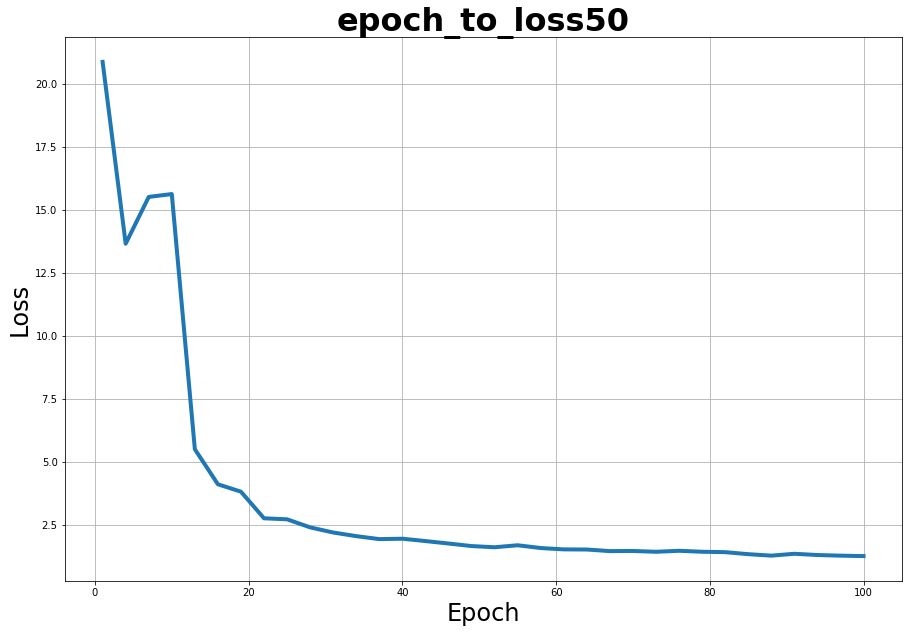

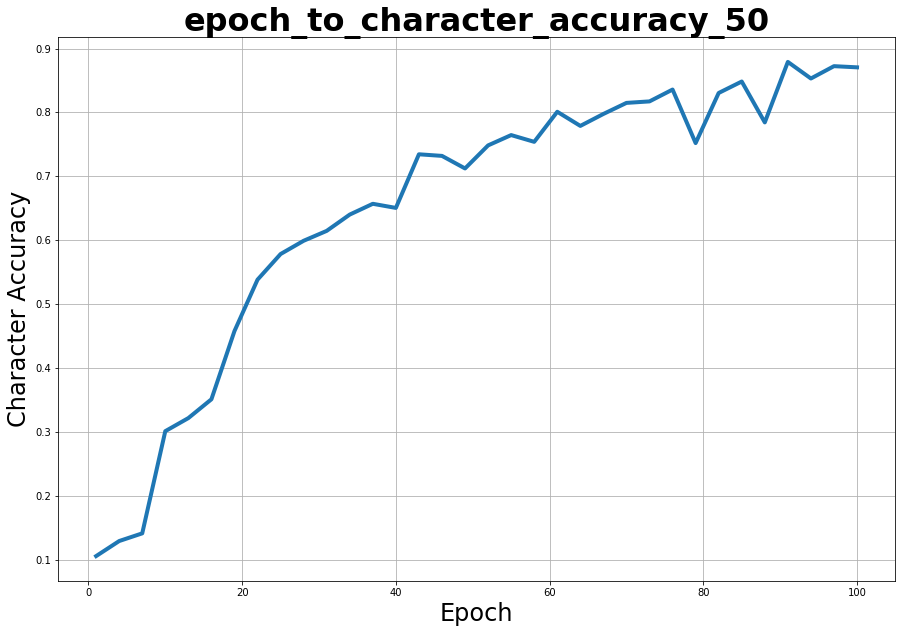

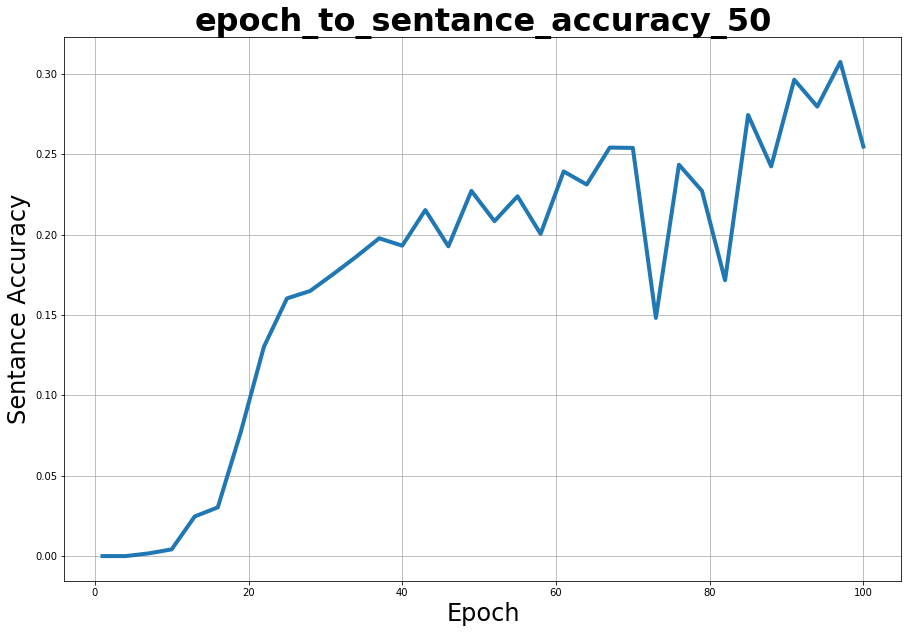

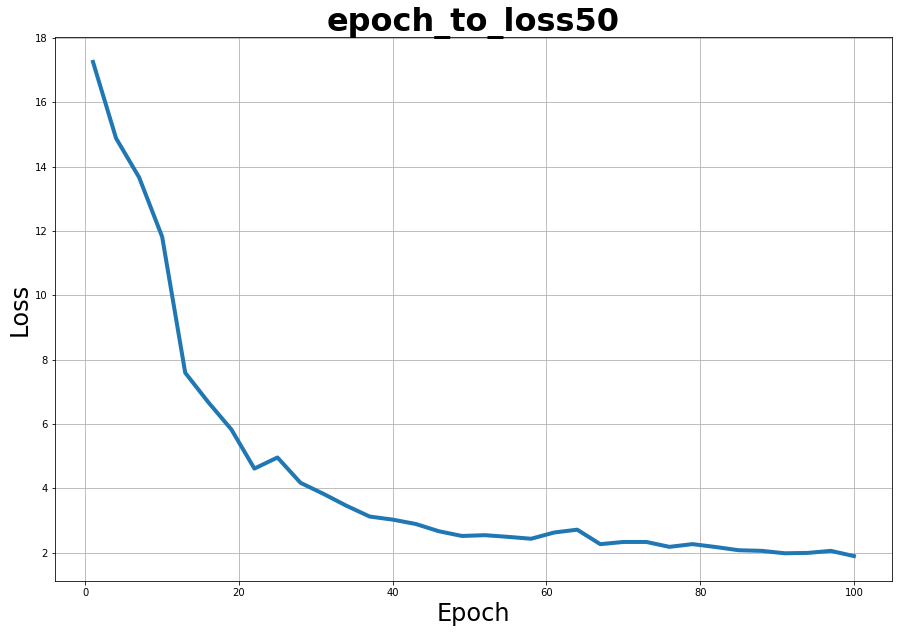

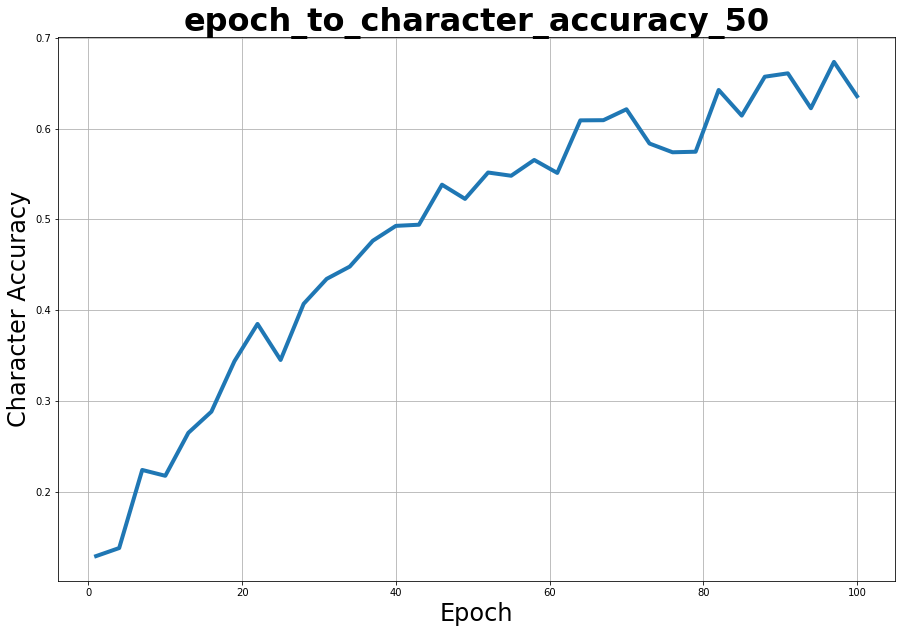

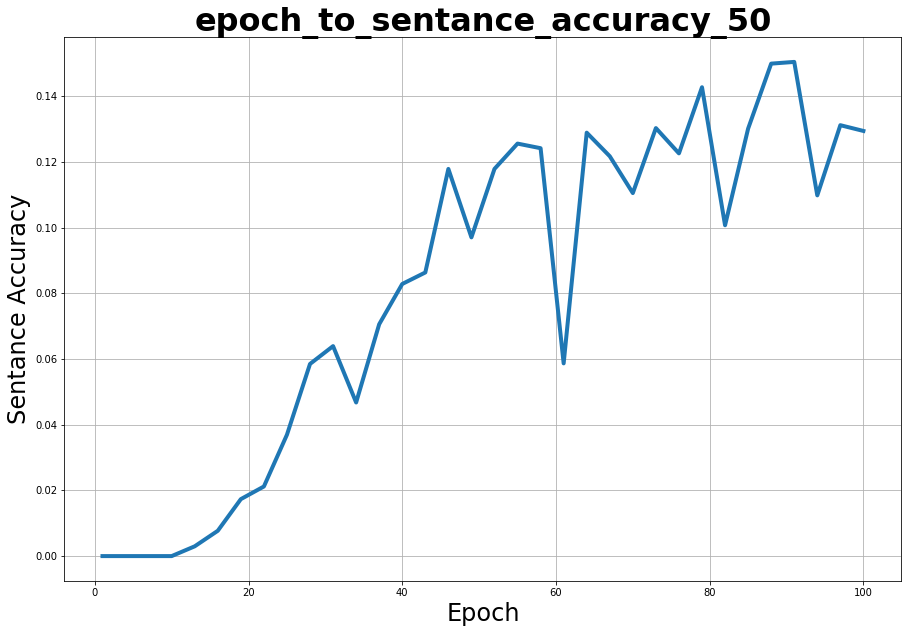

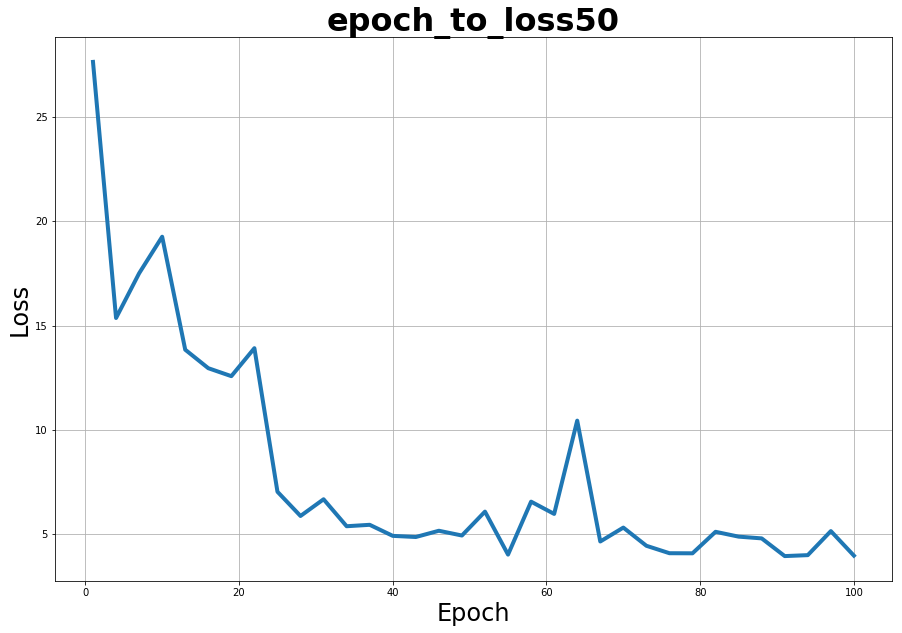

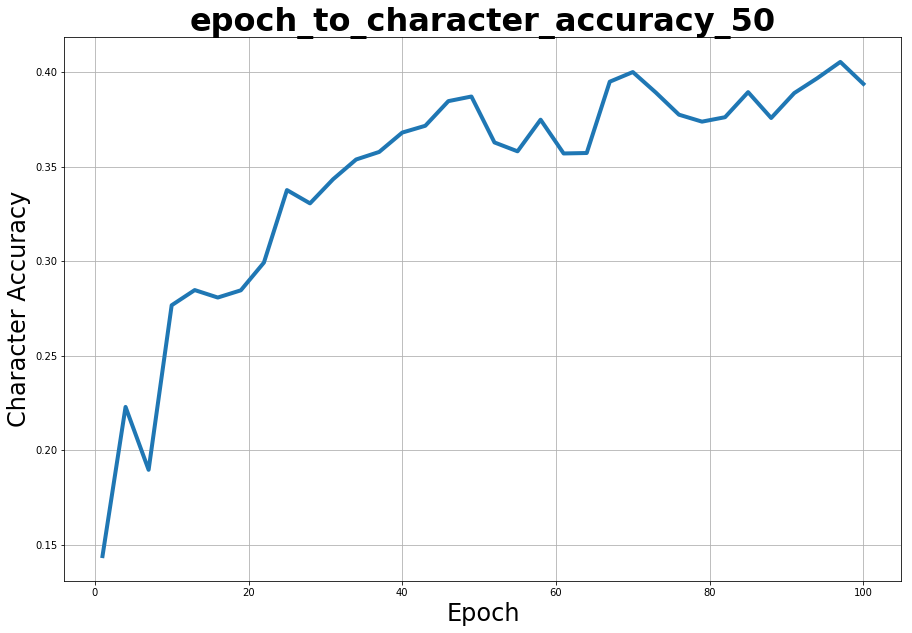

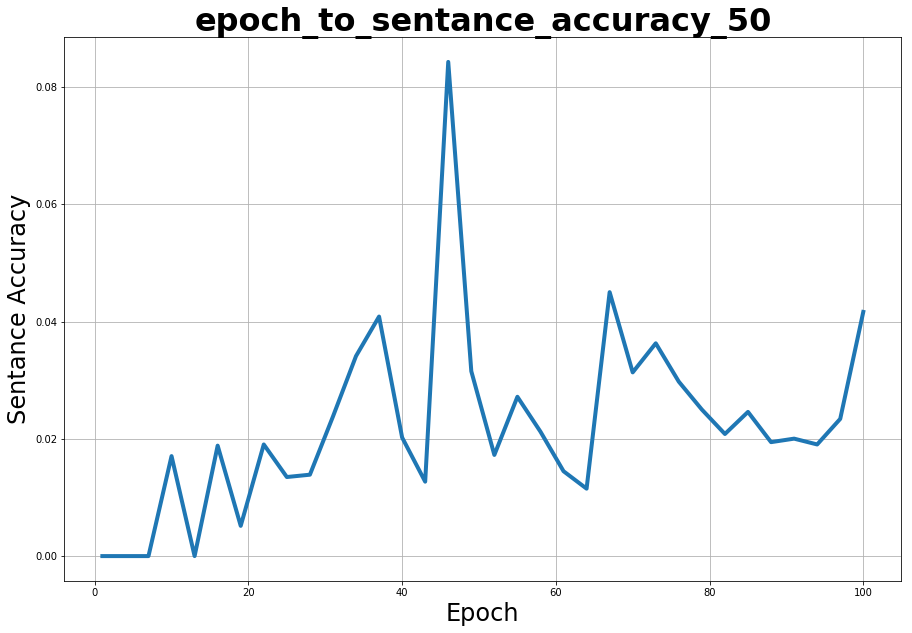

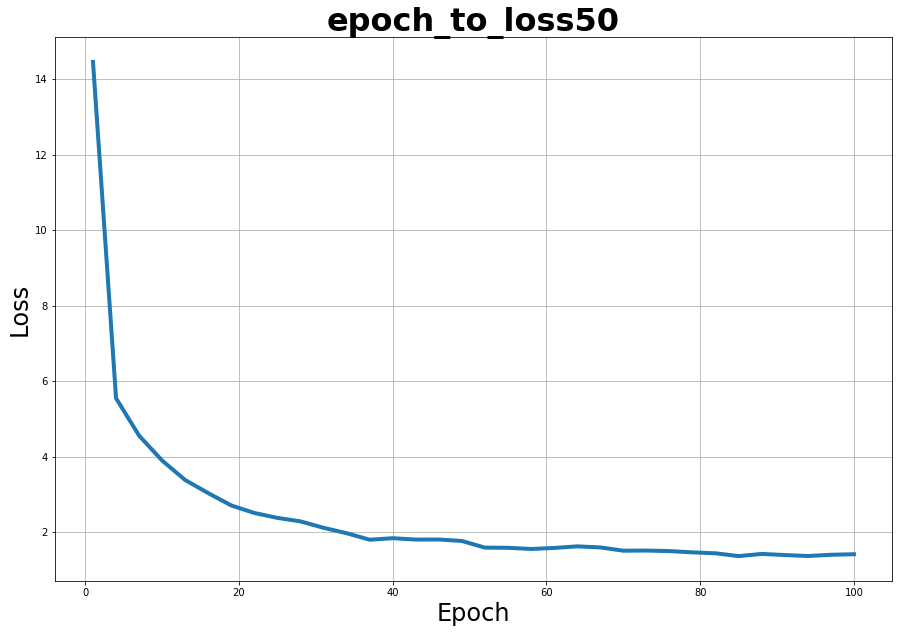

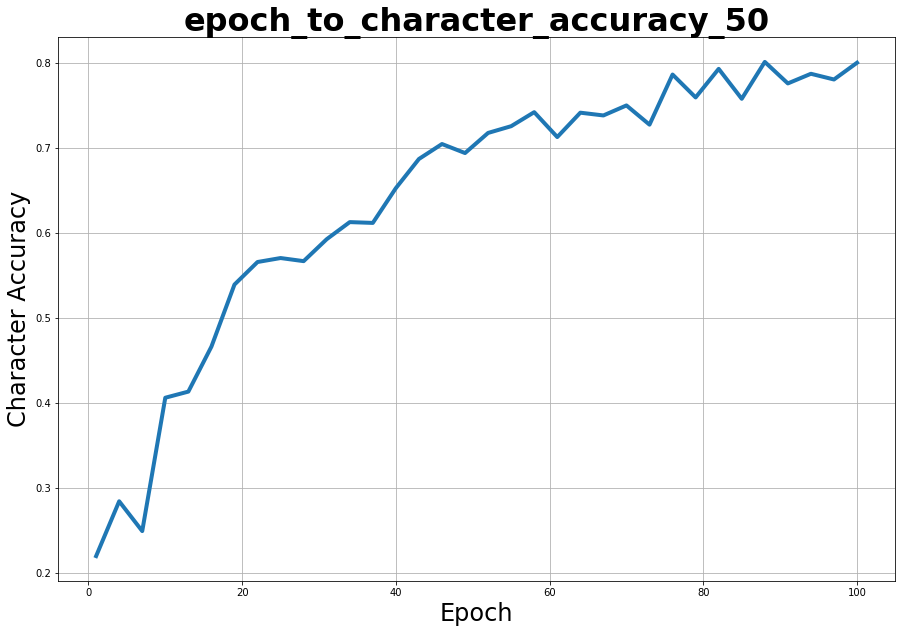

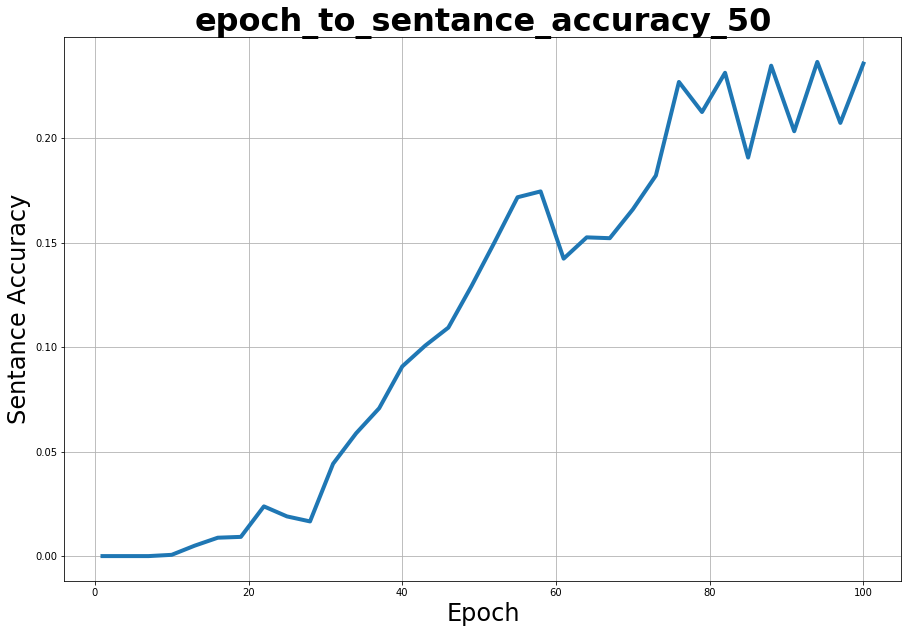

In [4]:
for i, j in zip(data_name, data_path):
    print("data : %s" % i)
    train_path = j + "/data_train.txt"
    dev_path = j + "/data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 104
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path="data_to_accuracy/" + i)

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    character_accuracy.append(character_accuracy_list)
    sentance_accuracy.append(sentance_accuracy_list)
    torch.save(seq2seq.state_dict(), 'log/pth/data_to_accuracy_' + i + '_model_save.pth')

- unMatching Data

In [4]:
c_0 = [0.10555318800196689, 0.10866415341747254, 0.11673823963284707, 0.1291132601212916, 0.12182920832650385, 0.13350270447467627, 0.14115063104409115, 0.13491558760858877, 0.16848057695459762, 0.3011047369283724, 0.29833469922963446, 0.32985412227503685, 0.321573512538928, 0.3865333551876742, 0.37109981970168826, 0.35099819701688245, 0.3932830683494509, 0.43591870185215537, 0.45776757908539584, 0.45407965907228326, 0.48230126208818225, 0.5382166857892149, 0.5579511555482708, 0.5508375676118669, 0.5783478118341255, 0.45908867398787084, 0.5763841993115882, 0.5991116210457302, 0.6095754794296017, 0.6334469759055893, 0.6146139977052942, 0.6240550729388625, 0.6271594820521226, 0.6401311260449106, 0.6442878216685789, 0.6300376987379118, 0.6569906572693001, 0.6929323061793149, 0.7054777905261432, 0.6505523684641862, 0.7251499754138666, 0.6967939682019341, 0.7344894279626291, 0.7114636944763154, 0.7173184723815768, 0.7319718079003442, 0.6878478937879037, 0.6384756597279134, 0.7123160137682347, 0.7446484182920833, 0.751650549090313, 0.7484150139321423, 0.7641009670545812, 0.7804523848549418, 0.7645566300606458, 0.6962727421734142, 0.7470447467628257, 0.7539813145386002, 0.7738665792493034, 0.775754794296017, 0.8010358957547943, 0.8121258810031142, 0.7907261104736928, 0.7789018193738731, 0.7956728405179478, 0.8008490411407966, 0.7976135059826258, 0.8250647434846746, 0.8350073758400263, 0.8149287002130798, 0.8130142599573841, 0.8124635305687592, 0.8172791345681036, 0.8359514833633831, 0.8572463530568759, 0.835810522865104, 0.8426618587116866, 0.775122111129323, 0.7520275364694312, 0.8140894935256515, 0.8137354532043928, 0.8304638583838715, 0.849824618914932, 0.8707851171939026, 0.8483986231765285, 0.8094312407802, 0.8577020160629405, 0.7844123914112441, 0.8912276675954761, 0.7999573840354041, 0.8790886739878708, 0.83176528437961, 0.860632683166694, 0.8531158826421898, 0.9135256515325356, 0.8780429437797083, 0.8724307490575316, 0.8928765776102279, 0.9029536141616129, 0.8705917062776594]
c_1 = [0.12928471356050045, 0.15493272680900422, 0.12686700137306486, 0.13814499984277884, 0.13303007116878215, 0.13693963755280011, 0.224124016057522, 0.19559012092054742, 0.23061200960097267, 0.21770589858885267, 0.22954290565681765, 0.24217649997729027, 0.2650259764308, 0.29428658274550085, 0.29470234539045004, 0.2883436225853449, 0.31728279895605144, 0.34111752806397855, 0.3439090772514945, 0.3453380429807736, 0.35838041233871726, 0.3849647649892915, 0.3786689306514896, 0.36621002651797036, 0.34525419169103594, 0.38020620429667984, 0.41581505200526864, 0.4070735550501186, 0.377470555968989, 0.41202078114463997, 0.43456280286911164, 0.4333923786165236, 0.4316978838030752, 0.4480873171430468, 0.4546941000136258, 0.46023876654752793, 0.4765408547940228, 0.4912392871242851, 0.476956617438972, 0.49291980672277713, 0.49756307189199955, 0.4946597209848334, 0.49418456367632, 0.5331614381893711, 0.5167789924568778, 0.5382623916484115, 0.5308380587028905, 0.5155072478958567, 0.522638101327296, 0.5364106756667051, 0.5597073589988156, 0.5516646227914793, 0.5532822539226682, 0.5144311563442235, 0.5481114243888464, 0.5261843121224509, 0.5728475548614532, 0.5654861103832354, 0.5456832307901935, 0.5292483780016142, 0.5512139221091394, 0.5801216542461943, 0.5594418299146464, 0.6091097438692479, 0.5396389503216046, 0.6121528469259768, 0.6092879278599403, 0.6123310309166693, 0.5883740186778748, 0.6213136003298151, 0.6100356018601011, 0.603834100223254, 0.5835805199478724, 0.5978142763808386, 0.6193151445910677, 0.5739620782542162, 0.6394953549879289, 0.6067199821117248, 0.5745560248898578, 0.6331121755566503, 0.6399146114366172, 0.642597852708222, 0.6281719370696071, 0.6191509358153315, 0.6143294866554166, 0.6580614280573404, 0.6064998724761635, 0.6571774957113559, 0.6401661653058301, 0.5974998340443224, 0.6609018904972032, 0.6751985353974725, 0.6542077625331475, 0.6224630617599687, 0.6550637444492193, 0.6668972577134452, 0.6734691025466335, 0.6912420821672763, 0.6761698128369337, 0.6357045779310393]
c_2 = [0.14410218259316362, 0.19494190413553425, 0.16768195164727742, 0.22296376960039102, 0.16599999281214173, 0.18974867653559607, 0.1897019554568423, 0.17724180314612556, 0.20575963083159926, 0.27670738588376514, 0.21528713696823326, 0.25671435810628684, 0.28473622357114364, 0.2907129277224912, 0.2652715033764964, 0.28078649545188267, 0.3059475933253548, 0.27824558755350465, 0.28460684212228704, 0.2881432683910339, 0.2898036636513601, 0.2992556972761611, 0.3194571729434639, 0.30588649653006145, 0.33760292114560086, 0.3212217921487024, 0.35023198812565814, 0.3305660078994562, 0.3056924243567765, 0.3563452615841321, 0.3433208623992352, 0.37391598112468416, 0.3509759314565835, 0.3537720083235399, 0.3593318166952384, 0.32977174956064215, 0.35776126966328475, 0.34710526977829054, 0.3527621142366315, 0.36799318591036023, 0.37298874740787863, 0.3857364140493878, 0.37159430290353535, 0.35497238065459824, 0.360826891215359, 0.38462229601756714, 0.38289002217454277, 0.3601548264671317, 0.38705897997103295, 0.3727263905810305, 0.3753715224243208, 0.36277480080647767, 0.37071379026548357, 0.36315216336564277, 0.35808472328542623, 0.38856124234942335, 0.39125668920060236, 0.3748072755501407, 0.38928721603467425, 0.3746958637469586, 0.35695622953706596, 0.36637951172878774, 0.3882521644438215, 0.35719702278910465, 0.39171311820073534, 0.37983877633900814, 0.3948901515559916, 0.3840544552142521, 0.37369675144745496, 0.3999935309275572, 0.3892045556645714, 0.3591053991597394, 0.3891326770818733, 0.3916196760432278, 0.361283320215492, 0.3774631891808357, 0.34822657566838094, 0.39356039777607665, 0.3737794118175578, 0.3977006041394876, 0.40085247999079954, 0.37612265361351604, 0.3989584793367044, 0.38410836415127564, 0.38937347033391195, 0.3965038257375641, 0.3881659101445838, 0.375705757833867, 0.3720291683288589, 0.39506266015446706, 0.3888703202550252, 0.39261160048446164, 0.35618353477306136, 0.3967518068478726, 0.3909332355784609, 0.3892656524598648, 0.4053556731968359, 0.39191437823229003, 0.40700888059889234, 0.3937257185162823]
c_3 = [0.21947760590708204, 0.20589562897488412, 0.336679422227013, 0.28392125687183356, 0.3492306241241781, 0.3127357982106284, 0.24888837986418022, 0.3652278484423844, 0.3311752182817721, 0.4057312439366174, 0.35953837447450687, 0.38582650641371136, 0.41293656354424924, 0.4103259404980058, 0.487533011749488, 0.4658092594588768, 0.4959307965937264, 0.5423830440875282, 0.538822491107039, 0.49562089037404333, 0.5369024199633502, 0.5653666325320685, 0.5527379540799827, 0.4921681308612698, 0.5700320685566455, 0.5916918184758003, 0.5952355287269592, 0.5663839333836369, 0.6194486364126334, 0.6321446857820416, 0.592183626172254, 0.6476635765872588, 0.6452618033847148, 0.6122972135388596, 0.6216718766842729, 0.6860313140023715, 0.6113506521504797, 0.6430655114800043, 0.6724425999784414, 0.6522683787862456, 0.6546465721677266, 0.6647218928532931, 0.686546701519888, 0.6351763770615501, 0.6823494933707017, 0.7041338794869031, 0.7039048183680069, 0.7236444971434731, 0.6935195914627573, 0.6788765225827315, 0.7141553034386117, 0.7171869947181201, 0.7208384984369948, 0.7317626926808235, 0.7251098145952355, 0.6831478387409723, 0.7338040314756926, 0.7416123207933599, 0.7361418023067802, 0.7557501077934677, 0.7123329201250405, 0.7558174787107901, 0.7380585049046028, 0.7409925083539938, 0.700694594157594, 0.7374083755524415, 0.7377418615931874, 0.7150008084510079, 0.769790206963458, 0.7495216664870109, 0.7624737253422442, 0.7863028187991807, 0.7269153551794761, 0.7780296701519888, 0.7664149240056053, 0.7858682763824513, 0.7686213215479142, 0.7875222324027163, 0.7589401207286839, 0.7782216772663577, 0.7802630160612267, 0.7925312601056376, 0.7774334375336854, 0.7927737954079983, 0.7573164816212138, 0.7476891775358413, 0.7987731755955589, 0.8007134580144444, 0.7986182224857173, 0.7740952085803601, 0.775408941468147, 0.7785181093025763, 0.811691548992131, 0.7867508353993748, 0.773872884553196, 0.8138777352592433, 0.7800373234881967, 0.8221879379109626, 0.8142785922173116, 0.7997399482591355]
character_accuracy.append(c_0)
character_accuracy.append(c_1)
character_accuracy.append(c_2)
character_accuracy.append(c_3)
s_0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0018804847471792729, 0.001671541997492687, 0.0018804847471792729, 0.004178854993731718, 0.004178854993731718, 0.003343083994985374, 0.011282908483075638, 0.024655244463017135, 0.026953614709569577, 0.039072294191391556, 0.030296698704554953, 0.06435436690346845, 0.07041370664437945, 0.07730881738403678, 0.10029251984956122, 0.09277058086084412, 0.130171333054743, 0.14625992478061012, 0.13330547430004178, 0.16025908900961136, 0.15837860426243208, 0.16903468449644798, 0.16485582950271627, 0.18428750522356874, 0.17969076473046386, 0.17530296698704556, 0.18951107396573338, 0.1863769327204346, 0.18616798997074802, 0.18658587547012118, 0.2041370664437944, 0.19765984120351024, 0.19912244045131633, 0.20079398244880903, 0.19306310071040536, 0.2118679481821981, 0.21082323443376516, 0.21521103217718346, 0.19160050146259924, 0.2083159214375261, 0.19264521521103217, 0.19640618470539073, 0.2014208106978688, 0.22712076890931884, 0.22440451316339324, 0.22941913915587128, 0.2083159214375261, 0.22524028416213956, 0.23506059339740912, 0.22377768491433347, 0.21061429168407855, 0.21291266193063102, 0.20037609694943587, 0.2321353949017969, 0.2187630589218554, 0.23923944839114084, 0.24780610112829085, 0.24968658587547013, 0.23109068115336398, 0.23631424989552863, 0.23735896364396156, 0.2540743836188884, 0.2538654408692018, 0.2530296698704555, 0.2538654408692018, 0.25616381111575426, 0.2735060593397409, 0.1481404095277894, 0.2557459256163811, 0.24947764312578355, 0.24341830338487255, 0.24300041788549936, 0.2538654408692018, 0.22712076890931884, 0.18825741746761387, 0.26243209360635184, 0.171541997492687, 0.26473046385290433, 0.2904304220643544, 0.27434183033848725, 0.24467195988299206, 0.27852068533221896, 0.24237358963643962, 0.31884663602173, 0.23735896364396156, 0.2962808190555788, 0.248223986627664, 0.2929377350605934, 0.2795653990806519, 0.3050564145424154, 0.3269954032595069, 0.3073547847889678, 0.2839531968240702, 0.2877141663184288, 0.2547012118679482]
s_1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0031540213772560015, 0.0028035745575608903, 0.0, 0.002277904328018223, 0.002978797967408446, 0.002978797967408446, 0.008060276852987559, 0.0017522340984755564, 0.007709830033292448, 0.014718766427194673, 0.013316979148414228, 0.01734711757490801, 0.02085158577185912, 0.02400560714911512, 0.021202032591554232, 0.02207814964079201, 0.03259155423164535, 0.03697213947783424, 0.03329244787103557, 0.02085158577185912, 0.058524618889083585, 0.043104958822498686, 0.07114070439810759, 0.0639565445943578, 0.0639565445943578, 0.06097774662694936, 0.04678465042929735, 0.07587173646399159, 0.08060276852987559, 0.07061503416856492, 0.08796215174347292, 0.06798668302085159, 0.08288067285789381, 0.09970212020325915, 0.09339407744874716, 0.08638514105484493, 0.09251796039950938, 0.10636060977746627, 0.11792535482740495, 0.08585947082530226, 0.10162957771158226, 0.09707376905554582, 0.0935693008585947, 0.11371999299106361, 0.11792535482740495, 0.10951463115472228, 0.09724899246539338, 0.12563518486069739, 0.1200280357455756, 0.10828806728578938, 0.12423339758191694, 0.10355703521990538, 0.06973891711932714, 0.05869984229893114, 0.10863851410548449, 0.13089188715612407, 0.12896442964780094, 0.11389521640091116, 0.11407043981075872, 0.12178026984405116, 0.11687401436831961, 0.12896442964780094, 0.1105659716138076, 0.1291396530576485, 0.10460837567899071, 0.1303662169265814, 0.10863851410548449, 0.09987734361310671, 0.12265638689328895, 0.12213071666374628, 0.1117925354827405, 0.14280707902575784, 0.11669879095847205, 0.1200280357455756, 0.10075346066234449, 0.09724899246539338, 0.1231820571228316, 0.13019099351673383, 0.13947783423865429, 0.1294900998773436, 0.14999123882950763, 0.1461363238128614, 0.10530926931838093, 0.1505169090590503, 0.14228140879621518, 0.12388295076222183, 0.10986507797441739, 0.14123006833712984, 0.11582267390923427, 0.13124233397581916, 0.12616085509024005, 0.13562291922200806, 0.1294900998773436]
s_2 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017060107121602858, 0.0, 0.017060107121602858, 0.0, 0.0, 0.0, 0.023011307280301527, 0.0, 0.018845467169212458, 0.0053560801428288035, 0.0162666137671097, 0.005157706804205514, 0.017060107121602858, 0.023011307280301527, 0.01904384050783575, 0.023408053957548105, 0.004959333465582225, 0.013489387026383654, 0.027772267407260465, 0.033723467565959134, 0.013886133703630232, 0.0307478674866098, 0.037690934338424915, 0.023804800634794683, 0.068637175163658, 0.019440587185082323, 0.034120214243205715, 0.06447133505256894, 0.008530053560801429, 0.04086490775639754, 0.06526482840706209, 0.02082920055544535, 0.02023408053957548, 0.04840309462408252, 0.043840507835746875, 0.012695893671890498, 0.026185280698274152, 0.015671493751239832, 0.08430866891489784, 0.018250347153342592, 0.015473120412616545, 0.031541360841102956, 0.029756000793493356, 0.0307478674866098, 0.017258480460226145, 0.03312834755008927, 0.023408053957548105, 0.027177147391390596, 0.04423725451299346, 0.0289625074390002, 0.021225947232691927, 0.024995040666534418, 0.02638365403689744, 0.0144812537195001, 0.021424320571315214, 0.035112080936322156, 0.011505653640150763, 0.033921840904582425, 0.024003173973417974, 0.04503074786748661, 0.025590160682404287, 0.007934933544931562, 0.031342987502479665, 0.013489387026383654, 0.021027573894068636, 0.036302320968061894, 0.03550882761356874, 0.03312834755008927, 0.029756000793493356, 0.01844872049196588, 0.03729418766117834, 0.024995040666534418, 0.02638365403689744, 0.0180519738147193, 0.02082920055544535, 0.043840507835746875, 0.03193810751834954, 0.02459829398928784, 0.03868280103154136, 0.04185677444951399, 0.019440587185082323, 0.03332672088871256, 0.034120214243205715, 0.020035707200952192, 0.03312834755008927, 0.025788534021027574, 0.01904384050783575, 0.023408053957548105, 0.027177147391390596, 0.023408053957548105, 0.02876413410037691, 0.025391787343780996, 0.0416584011108907]
s_3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00019984012789768185, 0.0015987210231814548, 0.0005995203836930455, 0.00019984012789768185, 0.001199040767386091, 0.004996003197442046, 0.00539568345323741, 0.005595523581135092, 0.008792965627498001, 0.012789768185451638, 0.010391686650679457, 0.009192645883293365, 0.007194244604316547, 0.02138289368505196, 0.02378097521982414, 0.03477218225419664, 0.02358113509192646, 0.018984812150279775, 0.03677058353317346, 0.05255795363709033, 0.016586730615507594, 0.06235011990407674, 0.06454836131095124, 0.04416466826538769, 0.06894484412470024, 0.07913669064748201, 0.05875299760191847, 0.060751398880895285, 0.10151878497202238, 0.07074340527577938, 0.06874500399680256, 0.10871302957633892, 0.09072741806554756, 0.08513189448441247, 0.09772182254196643, 0.10071942446043165, 0.0749400479616307, 0.10751398880895284, 0.10931254996003198, 0.12749800159872102, 0.12709832134292565, 0.12909672262190247, 0.10871302957633892, 0.1432853717026379, 0.15007993605115907, 0.14008792965627498, 0.1466826538768985, 0.17166266986410872, 0.1320943245403677, 0.16886490807354115, 0.17446043165467626, 0.1760591526778577, 0.1784572342126299, 0.14228617106314947, 0.17366107114308554, 0.18125499600319744, 0.15247801758593124, 0.13509192645883294, 0.17565947242206234, 0.1520783373301359, 0.14368505195843326, 0.2006394884092726, 0.16586730615507594, 0.20343725019984013, 0.24040767386091128, 0.18205435651478816, 0.21662669864108713, 0.21522781774580335, 0.2268185451638689, 0.20103916866506794, 0.22541966426858512, 0.2124300559552358, 0.2070343725019984, 0.2258193445243805, 0.2312150279776179, 0.22382094324540366, 0.22442046362909673, 0.1906474820143885, 0.1642685851318945, 0.23621103117505995, 0.2346123101518785, 0.23960831334932053, 0.22062350119904076, 0.20323741007194246, 0.21163069544364507, 0.2531974420463629, 0.23641087130295763, 0.2302158273381295, 0.2747801758593125, 0.20723421262989608, 0.2749800159872102, 0.2673860911270983, 0.2356115107913669]
sentance_accuracy.append(s_0)
sentance_accuracy.append(s_1)
sentance_accuracy.append(s_2)
sentance_accuracy.append(s_3)

data : unMatching_dedup


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-28 15:00:21,054 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-28 15:01:58,917 INFO   Finished epoch 1: Train loss: 2.0240, 

2019-02-28 16:11:09,261 INFO   Finished epoch 46: Train loss: 1.4323, Dev loss: 1.4467, Accuracy(character): 0.9011, Accuracy(sentance): 0.0518, F1 Score: 0.2502
2019-02-28 16:12:21,607 INFO   Finished epoch 47: Train loss: 1.4314, Dev loss: 1.4445, Accuracy(character): 0.9013, Accuracy(sentance): 0.0518, F1 Score: 0.2495
2019-02-28 16:13:34,898 INFO   Finished epoch 48: Train loss: 1.4310, Dev loss: 1.4479, Accuracy(character): 0.9013, Accuracy(sentance): 0.0518, F1 Score: 0.2496
2019-02-28 16:14:50,664 INFO   Finished epoch 49: Train loss: 1.4304, Dev loss: 1.4435, Accuracy(character): 0.9013, Accuracy(sentance): 0.0518, F1 Score: 0.2496
2019-02-28 16:16:02,932 INFO   Finished epoch 50: Train loss: 1.4294, Dev loss: 1.4462, Accuracy(character): 0.9013, Accuracy(sentance): 0.0518, F1 Score: 0.2496
2019-02-28 16:17:23,601 INFO   Finished epoch 51: Train loss: 1.4293, Dev loss: 1.4545, Accuracy(character): 0.9002, Accuracy(sentance): 0.0439, F1 Score: 0.2515
2019-02-28 16:18:41,481 INFO

2019-02-28 17:02:30,632 INFO   Finished epoch 97: Train loss: 1.2126, Dev loss: 1.2479, Accuracy(character): 0.9201, Accuracy(sentance): 0.1868, F1 Score: 0.5467
2019-02-28 17:03:06,318 INFO   Finished epoch 98: Train loss: 1.2218, Dev loss: 1.3196, Accuracy(character): 0.9008, Accuracy(sentance): 0.1841, F1 Score: 0.4673
2019-02-28 17:03:43,200 INFO   Finished epoch 99: Train loss: 1.2134, Dev loss: 1.2790, Accuracy(character): 0.9137, Accuracy(sentance): 0.1810, F1 Score: 0.5238
2019-02-28 17:04:20,556 INFO   Finished epoch 100: Train loss: 1.2110, Dev loss: 1.2570, Accuracy(character): 0.9155, Accuracy(sentance): 0.1852, F1 Score: 0.5243


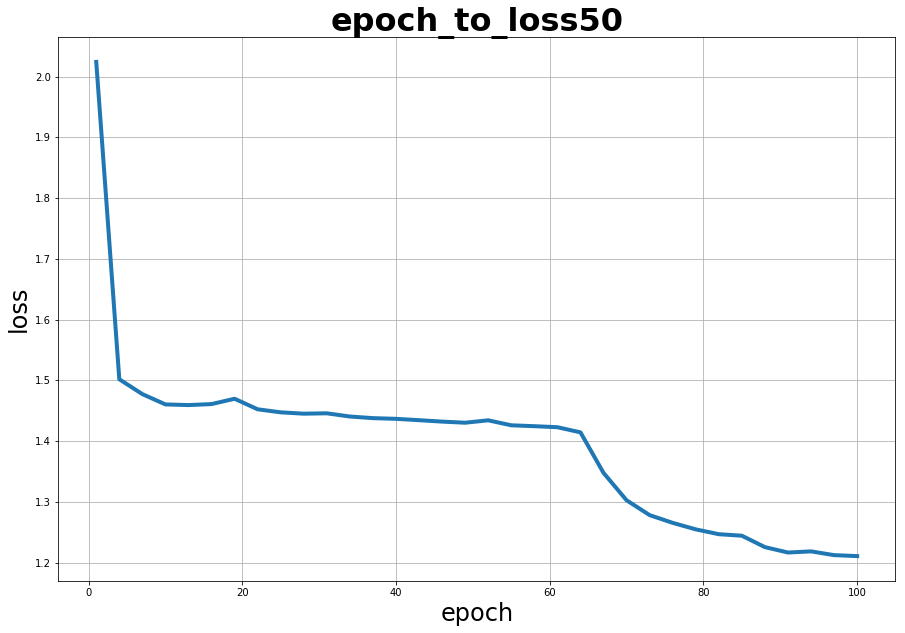

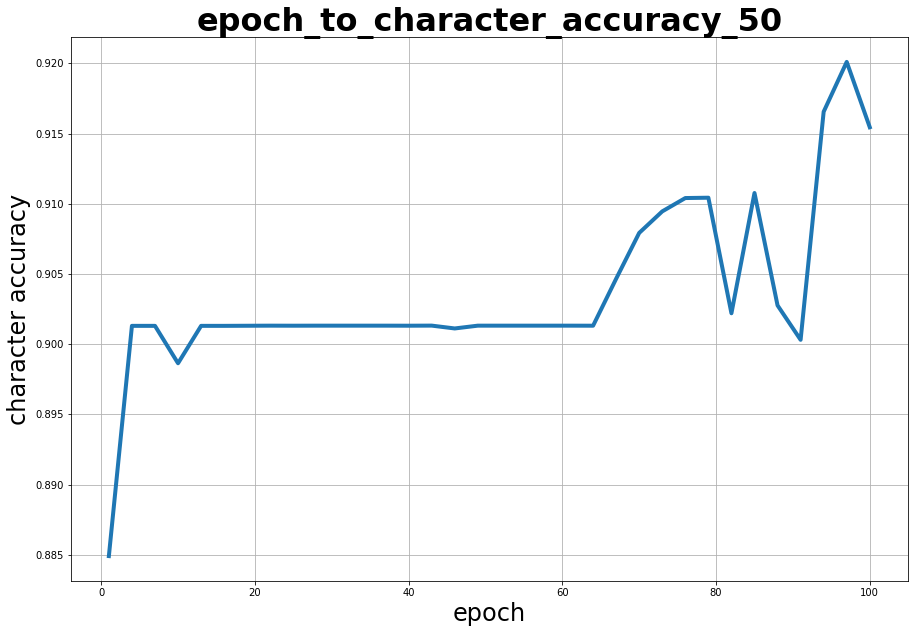

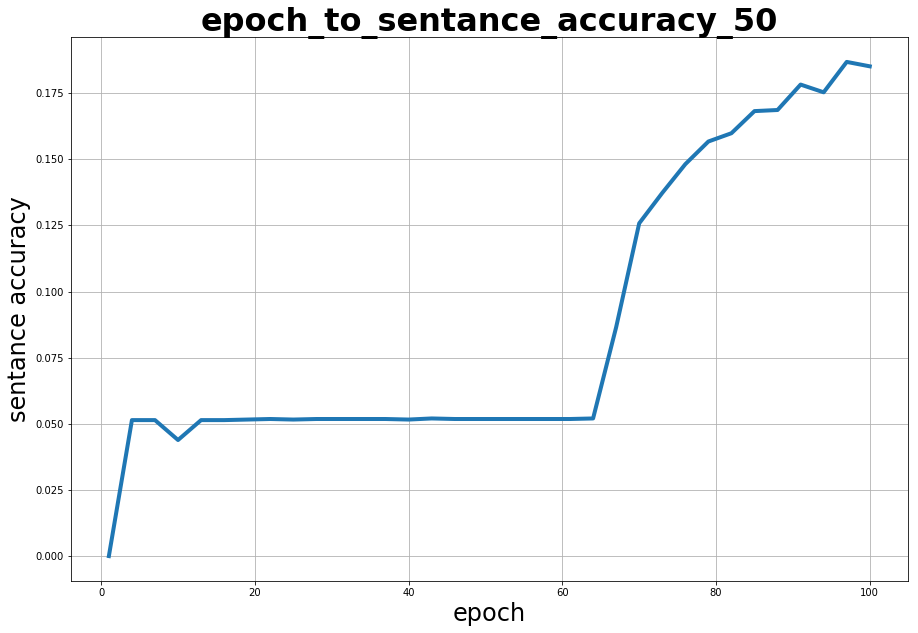

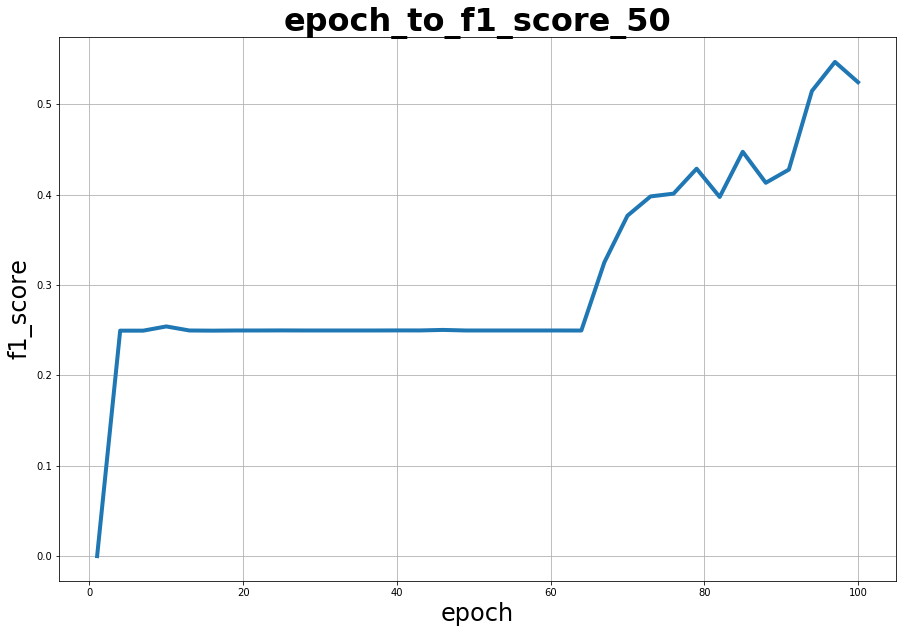

In [5]:
print("data : %s" % "unMatching_dedup")
train_path = "data/unmatching_dedup/N100" + "/data_train.txt"
dev_path = "data/unmatching_dedup/N100" + "/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer_unmatching(loss=loss, batch_size=32,
                                    checkpoint_every=50,
                                    print_every=100,
                                    hidden_size=hidden_size,
                                    path="data_to_accuracy/" + "unMatching_dedup")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list, f1_score_list = t.train(seq2seq, train,
                                                                                             num_epochs=100, dev_data=dev,
                                                                                             optimizer=optimizer,
                                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)
torch.save(seq2seq.state_dict(), 'log/pth/data_to_accuracy' + '_unMatching_dedup' + '_model_save.pth')

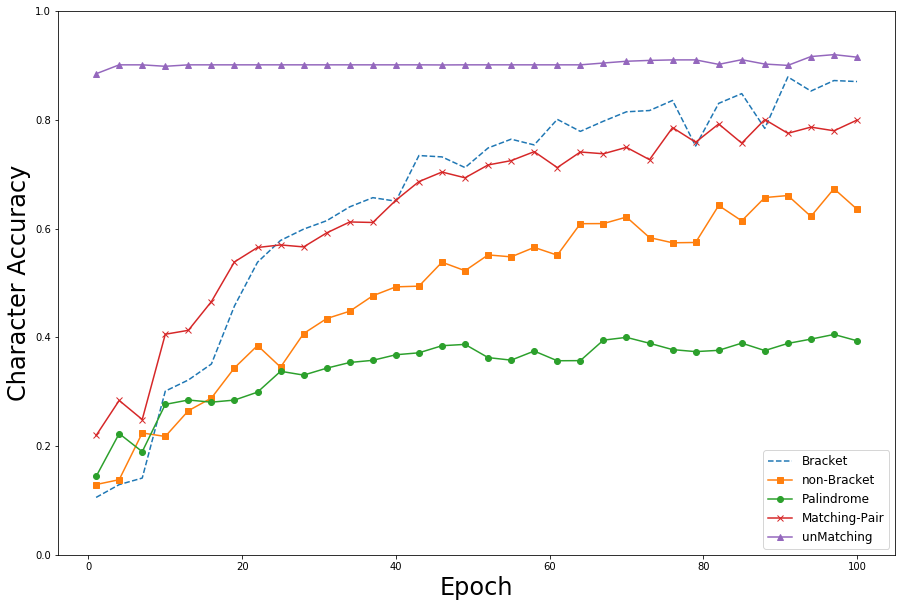

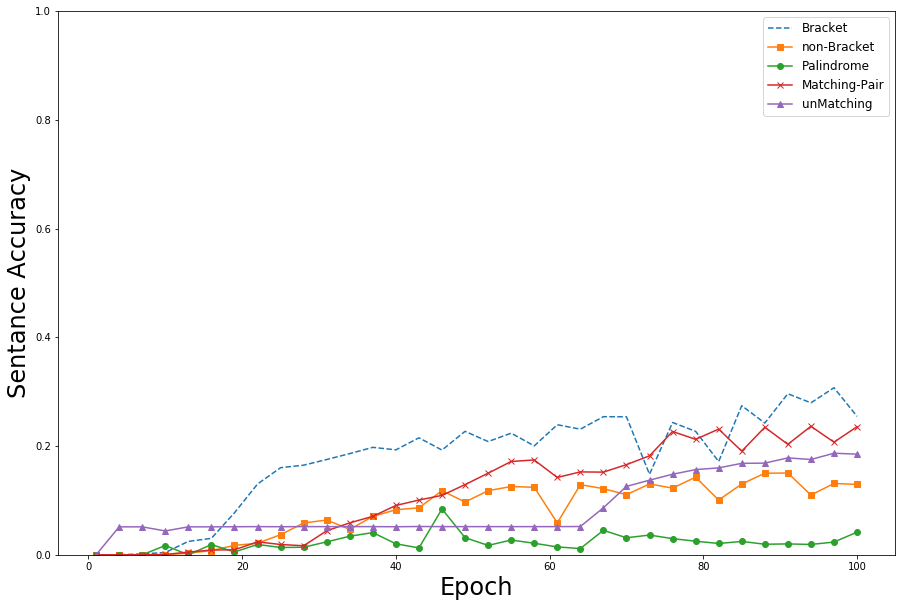

In [6]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', label="Bracket")
plt.plot(epochs[::3], character_accuracy[1][::3], '-s', label="non-Bracket")
plt.plot(epochs[::3], character_accuracy[2][::3], '-o', label="Palindrome")
plt.plot(epochs[::3], character_accuracy[3][::3], '-x', label="Matching-Pair")
plt.plot(epochs[::3], character_accuracy[4][::3], '-^', label="unMatching")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.savefig('log/plot/data_to_accuracy/dedup_data_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', label="Bracket")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-s', label="non-Bracket")
plt.plot(epochs[::3], sentance_accuracy[2][::3], '-o', label="Palindrome")
plt.plot(epochs[::3], sentance_accuracy[3][::3], '-x', label="Matching-Pair")
plt.plot(epochs[::3], sentance_accuracy[4][::3], '-^', label="unMatching")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.savefig('log/plot/data_to_accuracy/dedup_data_to_sentance_accuracy.png')

In [7]:
print(character_accuracy[0])
print(character_accuracy[1])
print(character_accuracy[2])
print(character_accuracy[3])
print(character_accuracy[4])

[0.10555318800196689, 0.10866415341747254, 0.11673823963284707, 0.1291132601212916, 0.12182920832650385, 0.13350270447467627, 0.14115063104409115, 0.13491558760858877, 0.16848057695459762, 0.3011047369283724, 0.29833469922963446, 0.32985412227503685, 0.321573512538928, 0.3865333551876742, 0.37109981970168826, 0.35099819701688245, 0.3932830683494509, 0.43591870185215537, 0.45776757908539584, 0.45407965907228326, 0.48230126208818225, 0.5382166857892149, 0.5579511555482708, 0.5508375676118669, 0.5783478118341255, 0.45908867398787084, 0.5763841993115882, 0.5991116210457302, 0.6095754794296017, 0.6334469759055893, 0.6146139977052942, 0.6240550729388625, 0.6271594820521226, 0.6401311260449106, 0.6442878216685789, 0.6300376987379118, 0.6569906572693001, 0.6929323061793149, 0.7054777905261432, 0.6505523684641862, 0.7251499754138666, 0.6967939682019341, 0.7344894279626291, 0.7114636944763154, 0.7173184723815768, 0.7319718079003442, 0.6878478937879037, 0.6384756597279134, 0.7123160137682347, 0.7

In [8]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])
print(sentance_accuracy[2])
print(sentance_accuracy[3])
print(sentance_accuracy[4])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0018804847471792729, 0.001671541997492687, 0.0018804847471792729, 0.004178854993731718, 0.004178854993731718, 0.003343083994985374, 0.011282908483075638, 0.024655244463017135, 0.026953614709569577, 0.039072294191391556, 0.030296698704554953, 0.06435436690346845, 0.07041370664437945, 0.07730881738403678, 0.10029251984956122, 0.09277058086084412, 0.130171333054743, 0.14625992478061012, 0.13330547430004178, 0.16025908900961136, 0.15837860426243208, 0.16903468449644798, 0.16485582950271627, 0.18428750522356874, 0.17969076473046386, 0.17530296698704556, 0.18951107396573338, 0.1863769327204346, 0.18616798997074802, 0.18658587547012118, 0.2041370664437944, 0.19765984120351024, 0.19912244045131633, 0.20079398244880903, 0.19306310071040536, 0.2118679481821981, 0.21082323443376516, 0.21521103217718346, 0.19160050146259924, 0.2083159214375261, 0.19264521521103217, 0.19640618470539073, 0.2014208106978688, 0.22712076890931884, 0.22440451316339324, 0.22941913915587128, 0.